**Introduction**:
As a newly hired data scientist at an Educational institution, I have been tasked with developing an end-to-end machine learning pipeline to address a key business problem: predicting student enrollment in a test preparation course based on the dataset features.

The dataset used in this analysis contains information on student gender- race/ethnicity- parental level of education- some modules scores, etc.


**Business Problem:**
The Educational institution wants to check the students performance by offering test preparation course. However, not all students take advantage of this course, which can impact badly on their academic results. By predicting whether a student will enroll in a test preparation course based on each student's data and academic performance, the educational institution can better target students who are likely to benefit from this program.

I will use some models**(Decision tree- KNN- SVM- RandomForest- LogisticRegression)** to check the best accuracy for our dataset.

The target variable: **"test preparation course"**, will be encoded as a binary outcome where students who did not complete the course will be labeled as "0" and those who completed it will be labeled as "1".

I can't use some models like Linear Regression cause this is a classification problem (binary one).

Dataset Link: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.tree
import sklearn.svm
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix as sk_confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from imblearn.over_sampling import SMOTE

**Import the dataset**

In [ ]:
df_org = pd.read_csv("/content/StudentsPerformance.csv")

In [ ]:
df = df_org.copy()
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


I did it as a copy to work on it as I need, so to keep the original data as it was.

**Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Breaking down of the dataset:


1.    gender: Gender of the student.
2.    race/ethnicity: Group to which the student belongs.
3.    parental level of education: The education level of the student’s parents.
4.    lunch: Type of lunch the student receives.
5.    test preparation course: Whether the student completed the test preparation course (none or completed).
6.    math score, reading score, writing score: Scores in these subjects.

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


I used this to check the missing values or NaN

In [ ]:
df.duplicated().sum()

0

To check if any of the data duplicated

In [ ]:
df['test preparation course'] = df['test preparation course'].map({'none': 0, 'completed': 1})

I replaced "none" with 0 as for students who didn't do the test preparation course, and replaced "completed" with 1 for students who did the test preparation course.

**Exploratory Data Analysis (EDA)**

In [ ]:
df['gender'].value_counts()

,count
gender,
female,518
male,482


To count the value of male and female

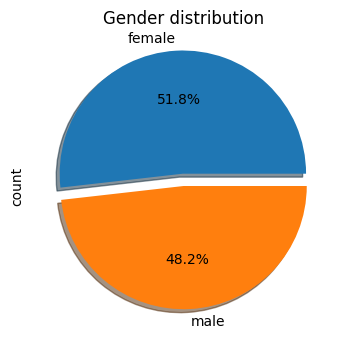

In [ ]:
plt.figure(figsize=(6, 4))
df['gender'].value_counts().plot(kind="pie", autopct="%0.1f%%", shadow = True, explode = [0.1,0])
plt.title('Gender distribution')
plt.show()

I started by creating a new plot with width of 6 inches and a height of 4 inches. Then I choosed which column I want to work with, here I choosed "gender". Then "pie" as to be a "pie chart", Then "%0.1f%%" format means that the percentages will be displayed with one decimal place. Then the shadow to be "3D appearance" . Then for exploade, I did (0.1) to make a bit of space between each part of the circle, cause if I did it as (0,0), It will be as one circle not like this shape.

In [ ]:
df['parental level of education'].value_counts()

,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


Checking the value for the parental level of eductation for each student.

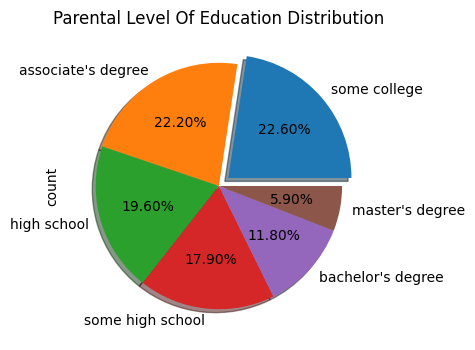

In [ ]:
plt.figure(figsize=(6, 4))
df['parental level of education'].value_counts() .plot(kind="pie", autopct="%0.2f%%", shadow = True, explode = [0.1, 0, 0, 0, 0, 0])
plt.title('Parental Level Of Education Distribution')
plt.show()

Its almost the same as the first visualization, I just changed here the autopct %0.2f%% to but as 2 decimals.

In [ ]:
df['test preparation course'].value_counts()

,count
test preparation course,
0,642
1,358


Checking the value for each student who did and didn't do the test preparation course.

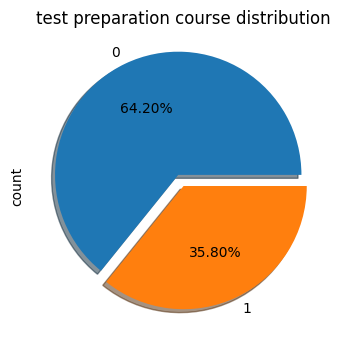

In [ ]:
plt.figure(figsize=(6, 4))
df['test preparation course'].value_counts().plot(kind="pie", autopct="%0.2f%%", shadow= True, explode = [0.1, 0])
plt.title('test preparation course distribution')
plt.show()

In [ ]:
pd.crosstab(df['test preparation course'], df['gender'])

gender,female,male
test preparation course,,
0,334,308
1,184,174


I used the crosstab library to count the occurrences of unique combinations of the specified two categories which are test prparation course with the other column gender to check how many male and female did and didn't do the test preparation course.

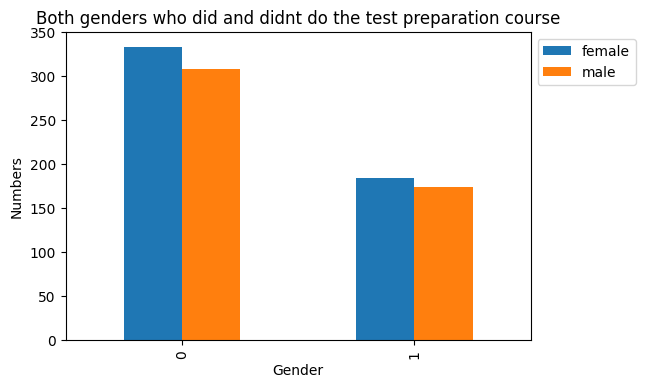

In [ ]:
pd.crosstab(df['test preparation course'], df['gender']).plot(kind = 'bar', figsize=(6,4))
plt.title('Both genders who did and didnt do the test preparation course')
plt.xlabel('Gender')
plt.ylabel('Numbers')
plt.xticks(rotation=90)
plt.legend(loc="upper left", bbox_to_anchor = (1,1))
plt.show()

Its almost the same as other visualizations, I added here xlabel and ylabel: They represent the x-axis and y-axis as for gender and the count of them. and I did the rotation=90 to make it more clear and could read it. Then for legend part it specifiy which bar correspond to which value and the anchor 1,1 not to overlap with the bar.

In [ ]:
label_encoder = LabelEncoder()
df['test preparation course'] = label_encoder.fit_transform(df['test preparation course'])
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

encoded_features = encoder.fit_transform(df[categorical_cols])
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
X = pd.concat([encoded_features_df, df[['math score', 'reading score', 'writing score']]], axis=1)
y=df['test preparation course']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

scaler = StandardScaler()
X_train[['math score', 'reading score', 'writing score']] = scaler.fit_transform(X_train[['math score', 'reading score', 'writing score']])
X_test[['math score', 'reading score', 'writing score']] = scaler.fit_transform(X_test[['math score', 'reading score', 'writing score']])





I started by converting the categorical text into numerical format using (LabelEncoder).

Then I tured the array of encoded features into a dataframe. then splited the data into 2 parts(80% for training/ 20% for testing).

Then I used the(standardscaler) to scale the numerical features to have an mean of 0 and standard deviation of 1.

In [ ]:
smote = SMOTE(random_state=50)
X_resampled, y_resampled = smote.fit_resample(X,y)

Trying to handle the imbalance using SMOTE

In [ ]:
print("the original class distribution is")
print(y.value_counts())

print("\nClass distribution after SMOTE is")
print(y_resampled.value_counts())

the original class distribution is
test preparation course
0    642
1    358
Name: count, dtype: int64

Class distribution after SMOTE is
test preparation course
0    642
1    642
Name: count, dtype: int64


Checking the distribution after using SMOTE

Now our data is balanced and ready to be modeled

**Model Training**

**Decision Tree - Model 1**

In [ ]:
parameters_grid = {"criterion": ["gini", "entropy"], "max_depth": range(5, 25, 5), "min_samples_split": range(5, 25, 5),
                   "class_weight": [None, "balaned"], "min_impurity_decrease": [0.0, 0.01, 0.05]}
model1 = sklearn.model_selection.GridSearchCV(sklearn.tree.DecisionTreeClassifier(), parameters_grid, scoring= "accuracy",
                                              cv=5, n_jobs= -1)

model1.fit(X_train, y_train)
print("The accuracy of decision tree classfier = {:.3f}".format(model1.best_score_))

The accuracy of decision tree classfier = 0.691


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

I started by defining the grid of the hyperparameters(to optimize model performance),

The breaking down for each parameter:

criterion: to specifiy how the tree will decide which feature to split(gini, entropy) on at each node.

gini: It measures the frequency at which an element taken at random would be incorrectly labeled if it was labeled randomly following the label's distribution of the subset.

entropy: it measures the level of uncertainty or disorder in the data.

then for the max_depth: the maximum depth of the tree, controlling how deep the tree can grow.

min_samples_split: specifiy the minimum number of samples required to split an internal node

then for the weight: I choosed to be as "none" so no adjustment is made to the weights, treating all classes equally.


GridSearchCV:I used it for the hyperparameter optimization

Model.fit: to train the training dataset that I splitted

**KNN - Model 2**

In [ ]:
parameters_grid = {
     "n_neighbors": [3, 7, 11, 19, 25], "weights": ["uniform", "distance"], "metric": ["minkowski", "euclidean", "manhattan"]}

model2 = sklearn.model_selection.GridSearchCV(sklearn.neighbors.KNeighborsClassifier(),
                                                 parameters_grid, scoring="accuracy", cv=5, n_jobs = -1)

model2.fit(X_train, y_train)
print("The accuracy of KNN classfier = {:.3f}".format(model2.best_score_))

The accuracy of KNN classfier = 0.672


The breaking down for each parameter:

n_neighbors: the closest points in the training data and makes a prediction based on their labels.

metric: defines the distance metric used to measure how close neighbors are to each other.

Properties of Distance Metrics:

minkowski: is applied to determine the similarity of size.

Euclidean: distance is the shortest distance between any two points in a metric space

manhattan: It sums the absolute differences of the coordinates

Then I Initialize a grid search object to find the best hyperparameters for the KNN classifier.

**SVM - Model 3**

In [ ]:
parameters_grid = {
    "kernel": ["linear", "rbf", "poly"],
    "C": [0.1, 1, 10, 50, 100],
    "degree": [2, 3, 4, 5],
    "gamma": ["scale", "auto"],
    "class_weight": [None, "balanced"]
}
model3 = sklearn.model_selection.GridSearchCV(sklearn.svm.SVC(),
                                               parameters_grid, scoring= "accuracy", cv=5, n_jobs = -1)

model3.fit(X_train, y_train)
print("The accuracy of SVM classfier = {:.3f}".format(model3.best_score_))

The accuracy of SVM classfier = 0.729


The breaking down for each parameter:

linear: to separate the data into different classes

Radial Basis Function: allow the model to fit more complex boundaries.

poly: I used to represent the decision boundary as a polynomial function but at the same time it could increase the risk of overfitting.

**Random Forest - Model 4**

In [ ]:
rf_model = RandomForestClassifier(random_state=50)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"The accuracy for RandomForest = {rf_accuracy}")

The accuracy for RandomForest = 0.635


In this code above I used a RandomForestclassifier, made predictions using the testing data that I splitted before then I printed it.

I put no.20 (random number) as a generator for the model.

**Logistic Regression - Model 5**

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy for logisticRegression = : {accuracy:.3f}")

The accuracy for logisticRegression = : 0.765


Started by fitting the model as I splitted before for training.
Then did the prediction for the testing data.

Then I checked the accuracy.

**Model Evaluation**

The best model with highest accuracy among the other models is the fifth model "LogisticRegression".



In [ ]:
accuracy_score = accuracy_score(y_test, y_pred)
print('Accuracy_score: ', accuracy_score)
precision_score = precision_score(y_test, y_pred)
print('Precision_score: ', precision_score)
f1_score = f1_score(y_test, y_pred)
print('f1_score: ', f1_score)
print(classification_report(y_test, y_pred))



Accuracy_score:  0.765
Precision_score:  0.7627118644067796
f1_score:  0.656934306569343
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       122
           1       0.76      0.58      0.66        78

    accuracy                           0.77       200
   macro avg       0.76      0.73      0.74       200
weighted avg       0.76      0.77      0.76       200



<Axes: >

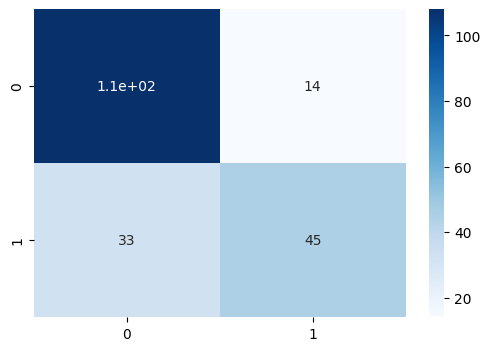

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix,
            annot = True,
            cmap = 'Blues')

precision_recall_fscore_support: This function computes several metrics

The breaking down:
Precision: I used it to measure the accuracy of the positive predictions.

Recall: I used it to measure the ability of the model to find all the relevant cases.

F1-Score: It provides a balance between the two metrics that I used.

Support: The number of actual occurrences of each class in our test set.

# Conclusion



1.   The average scores for the 3 subjects are so similar

2.   Students who completed the test preparation course have better scores than who didnt.

3.   Logistic Regression have the best accuracy



